This Dataset is from: https://www.kaggle.com/datasets/anlgrbz/student-demographics-online-education-dataoulad/discussion/211264?resource=download

In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [133]:
studentInfo = pd.read_csv("./data/studentInfo.csv")
studentInfo.head()

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass


In [134]:
studentInfo['age_band'].dtype

dtype('O')

In [135]:
studentInfo.isna().sum()

code_module                0
code_presentation          0
id_student                 0
gender                     0
region                     0
highest_education          0
imd_band                1111
age_band                   0
num_of_prev_attempts       0
studied_credits            0
disability                 0
final_result               0
dtype: int64

In [136]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier


In [137]:
highest_education = set(studentInfo['highest_education'])
highest_education

{'A Level or Equivalent',
 'HE Qualification',
 'Lower Than A Level',
 'No Formal quals',
 'Post Graduate Qualification'}

In [138]:
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'), ['highest_education'])
    ,('onehot2', OneHotEncoder(handle_unknown='ignore'), ['age_band'])],
    remainder='passthrough'
)

In [139]:
studentInfo.describe()

,id_student,num_of_prev_attempts,studied_credits
count,3.259300e+04,32593.000000,32593.000000
mean,7.066877e+05,0.163225,79.758691
std,5.491673e+05,0.479758,41.071900
min,3.733000e+03,0.000000,30.000000
25%,5.085730e+05,0.000000,60.000000
50%,5.903100e+05,0.000000,60.000000
75%,6.444530e+05,0.000000,120.000000
max,2.716795e+06,6.000000,655.000000


In [140]:
data = studentInfo[['gender', 'highest_education','age_band', 'studied_credits', 'disability','final_result']]
data.head()


,gender,highest_education,age_band,studied_credits,disability,final_result
0,M,HE Qualification,55<=,240,N,Pass
1,F,HE Qualification,35-55,60,N,Pass
2,F,A Level or Equivalent,35-55,60,Y,Withdrawn
3,F,A Level or Equivalent,35-55,60,N,Pass
4,F,Lower Than A Level,0-35,60,N,Pass


In [141]:
data.shape

(32593, 6)

In [142]:
le = LabelEncoder()
data['gender'] = le.fit_transform(data['gender'])
data['disability'] = le.fit_transform(data['disability'])


/tmp/ipykernel_4264/4172702738.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['gender'] = le.fit_transform(data['gender'])
/tmp/ipykernel_4264/4172702738.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['disability'] = le.fit_transform(data['disability'])


In [143]:
data.head()

,gender,highest_education,age_band,studied_credits,disability,final_result
0,1,HE Qualification,55<=,240,0,Pass
1,0,HE Qualification,35-55,60,0,Pass
2,0,A Level or Equivalent,35-55,60,1,Withdrawn
3,0,A Level or Equivalent,35-55,60,0,Pass
4,0,Lower Than A Level,0-35,60,0,Pass


In [144]:
pass_count = data[data['final_result'] == 'Pass']
pass_count['final_result'].count().sum()

12361

In [145]:
d_count = data[data['final_result'] == 'Distinction']
d_count['final_result'].count().sum()

3024

In [146]:
w_count = data[data['final_result'] == 'Withdrawn']
w_count['final_result'].count().sum()

10156

In [147]:
data[data['final_result'] == 'Fail'].count().sum()

42312

In [148]:
f_count = data[data['final_result'] == 'Fail']
f_count['final_result'].count().sum()

7052

In [149]:
x = data[['gender', 'highest_education', 'studied_credits','age_band', 'disability']]
y = data['final_result']
#y = [y[i] for i in range(len(y))]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=66)


In [166]:
f_count['final_result'].count().sum() + d_count['final_result'].count().sum() + w_count['final_result'].count().sum() #Cases that didn't pass

20232

In [150]:
clf = Pipeline([
    ('preprocessor', preprocessor),
    ('DecisionTreeClassifier', DecisionTreeClassifier(max_depth=3, min_samples_split=4, min_samples_leaf=4, criterion='entropy'))
])


In [151]:
clf.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['highest_education']),
                                                 ('onehot2',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['age_band'])])),
                ('DecisionTreeClassifier',
                 DecisionTreeClassifier(criterion='entropy', max_depth=3,
                                        min_samples_leaf=4,
                                        min_samples_split=4))])

In [152]:
y_pred = clf.predict(X_test)


In [153]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 41.61%


In [154]:
report = classification_report(y_test, y_pred)
print('Classification Report:')
print(report)

/home/powerfull/Development/RihalIntern/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/powerfull/Development/RihalIntern/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Classification Report:
              precision    recall  f1-score   support

 Distinction       0.00      0.00      0.00       884
        Fail       0.00      0.00      0.00      2134
        Pass       0.41      0.89      0.56      3745
   Withdrawn       0.47      0.25      0.32      3015

    accuracy                           0.42      9778
   macro avg       0.22      0.28      0.22      9778
weighted avg       0.30      0.42      0.31      9778



/home/powerfull/Development/RihalIntern/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [155]:
pip2 = Pipeline([
    ('preprocessor', preprocessor), ('lr', LogisticRegression())
])
pip2

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['highest_education']),
                                                 ('onehot2',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['age_band'])])),
                ('lr', LogisticRegression())])

In [156]:
pip2.fit(X_train, y_train)

/home/powerfull/Development/RihalIntern/.venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['highest_education']),
                                                 ('onehot2',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['age_band'])])),
                ('lr', LogisticRegression())])

In [157]:
y_pred = pip2.predict(X_test)

In [158]:
accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 41.85%


In [159]:
report = classification_report(y_test, y_pred)
print('Classification Report:')
print(report)

Classification Report:
              precision    recall  f1-score   support

 Distinction       0.00      0.00      0.00       884
        Fail       0.36      0.00      0.00      2134
        Pass       0.41      0.79      0.54      3745
   Withdrawn       0.43      0.37      0.40      3015

    accuracy                           0.42      9778
   macro avg       0.30      0.29      0.24      9778
weighted avg       0.37      0.42      0.33      9778



/home/powerfull/Development/RihalIntern/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/powerfull/Development/RihalIntern/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/powerfull/Development/RihalIntern/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

In [160]:
pip3 = Pipeline([
    ('preprocessor', preprocessor),
    ('RandoForestClassifier', RandomForestClassifier(max_depth=32, min_samples_split=4, min_samples_leaf=4, criterion='entropy', n_estimators=1000))
])

In [161]:
pip3.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['highest_education']),
                                                 ('onehot2',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['age_band'])])),
                ('RandoForestClassifier',
                 RandomForestClassifier(criterion='entropy', max_depth=32,
                                        min_samples_leaf=4, min_samples_split=4,
                                        n_estimators=1000))])

In [162]:
y_pred = pip2.predict(X_test)

In [163]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 41.85%


In [164]:
report = classification_report(y_test, y_pred)
print('Classification Report:')
print(report)

Classification Report:
              precision    recall  f1-score   support

 Distinction       0.00      0.00      0.00       884
        Fail       0.36      0.00      0.00      2134
        Pass       0.41      0.79      0.54      3745
   Withdrawn       0.43      0.37      0.40      3015

    accuracy                           0.42      9778
   macro avg       0.30      0.29      0.24      9778
weighted avg       0.37      0.42      0.33      9778



/home/powerfull/Development/RihalIntern/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/powerfull/Development/RihalIntern/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/powerfull/Development/RihalIntern/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

<Axes: >

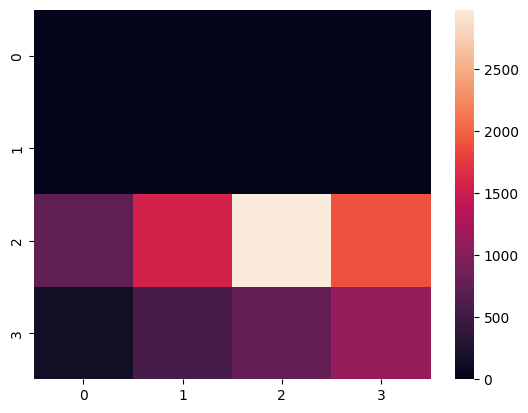

In [167]:
sns.heatmap(confusion_matrix(y_pred, y_test))